# Test Set Forecasting Analysis for SV Model

- Step 1: Obtain parameters simulated from the posterior distribution using the training data

- Step 2: Compute 1-step-ahead forecasts via the Stan generated quantities block using $y_{test}[t-1]$ to predict $y_{test}[t]$ 


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\nklatsky\econometrics\econometrics2024\project\code\stochastic_volatility


## Read in Real Data

In [3]:
# Read in the train-test split 
# Read train_test.csv
train_test_split = pd.read_csv("../../train_test.csv")
train_size = train_test_split['train'][0]
test_size = train_test_split['test'][0]

# Define data path:
data_path = "../../data/DXY_approx_percent_returns.csv"
real_data = pd.read_csv(data_path, index_col=0)
real_data = real_data - np.mean(real_data)

# calculate the splitting point as the train_size * len of data, rounded
split_point = int(train_size * len(real_data))

# Take test data range only
real_data = real_data.iloc[split_point:]
real_data


,DXY
Date,
2019-08-28,0.214132
2019-08-29,0.301012
2019-08-30,0.413394
2019-02-09,-0.000945
2019-03-09,0.083940
...,...
2024-03-21,-0.411072
2024-03-22,0.567956
2024-03-25,0.448986


# Read in Predictions

In [4]:
# Read in predictions

y_pred_path = "sampler_outputs/y_pred_samples.csv"
y_pred = pd.read_csv(y_pred_path)
y_pred

,0,1,2,3,4,5,6,7,8,9,...,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170
0,-0.167846,0.504109,0.369099,-0.687507,0.285529,0.654681,-0.436770,-0.124782,-0.031299,-1.120140,...,-0.421202,0.424638,0.770077,0.017141,-0.245437,0.011248,0.104028,0.504842,-0.176587,-0.160356
1,-0.002764,-0.006255,0.077682,0.075117,-0.399187,0.691047,0.238646,0.008085,0.599180,-0.619155,...,0.864191,-0.505249,0.179454,0.650975,0.015796,-2.492100,0.581710,0.704393,0.154051,-0.497986
2,0.504061,0.165215,0.295032,-0.166710,0.198171,-0.346093,-0.188140,-0.057466,-0.079605,-0.074225,...,0.220375,-0.213066,0.085635,0.564033,-0.817614,-0.217153,0.514220,-0.355571,-0.137941,-0.143481
3,-0.356234,-0.277403,-0.267017,0.173562,0.398539,-0.360070,0.461043,-0.395657,-0.256164,0.152040,...,-0.191075,-0.765700,0.739255,0.245456,0.870211,-0.313861,-0.966782,1.216020,1.316180,-0.323007
4,0.157118,-0.021673,0.404959,0.019073,-0.238203,0.203507,0.075181,-0.535205,-0.073678,-0.095304,...,-0.232860,0.196348,0.265595,0.316592,0.427907,-0.591949,0.064354,-0.484640,-0.379569,0.657632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.255964,-0.356914,0.320383,0.319786,0.138121,-0.175296,0.343825,-0.227815,-0.155930,-0.504151,...,0.094396,-0.475777,-0.175440,-0.522920,0.164657,0.149912,0.105903,-0.266153,0.750069,0.768329
3996,-0.395163,0.010122,-0.124686,-0.139948,0.054327,-0.084141,0.007728,-0.047401,-0.136676,-0.335230,...,0.132876,-0.132115,-0.417264,0.290596,-0.073669,0.174358,0.209846,-0.489820,-1.175930,0.139966
3997,-0.382510,0.041775,0.071703,0.030547,0.366015,0.165253,-0.395997,0.056366,-0.241133,0.274543,...,0.927030,0.138383,1.037640,-0.468613,-0.132594,-0.565384,1.414500,-1.286570,0.178478,0.109844
3998,-0.395007,0.044712,-0.779657,0.174054,0.010927,-0.667969,0.303071,0.677015,0.222624,-1.118340,...,0.393911,-0.342759,0.658139,1.818650,-0.798424,-0.997828,-0.758824,-1.411660,-1.023120,1.730090


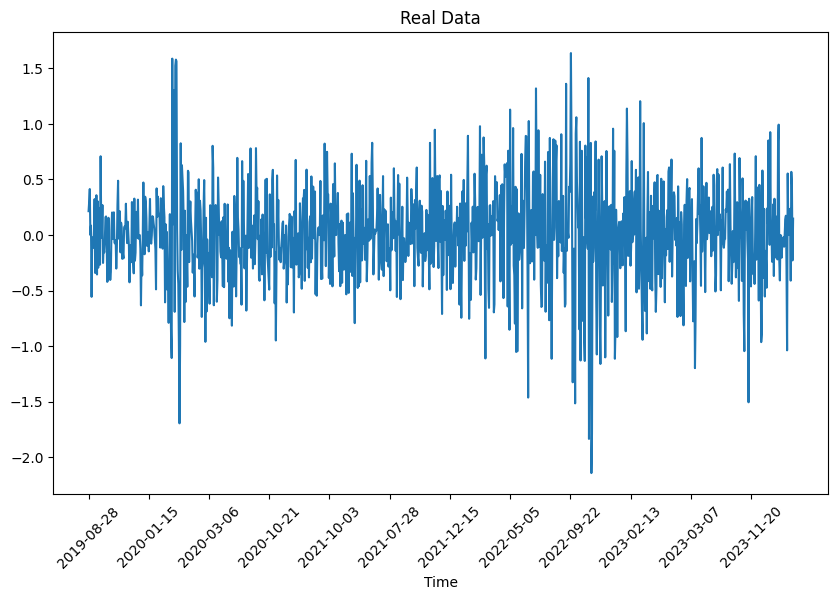

In [9]:
# Plot the real data
plt.figure(figsize=(10, 6))
plt.plot(real_data, label='Real Data')
plt.title('Real Data')
plt.xlabel('Time')
# Reduce tick frequency
plt.xticks(np.arange(0, len(real_data), step=100))
# tilt ticks
plt.xticks(rotation=45)
plt.show()

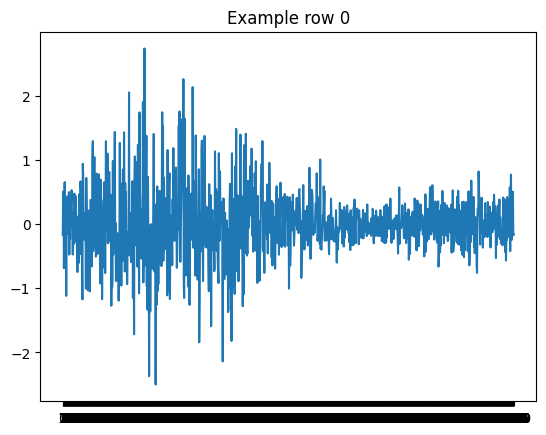

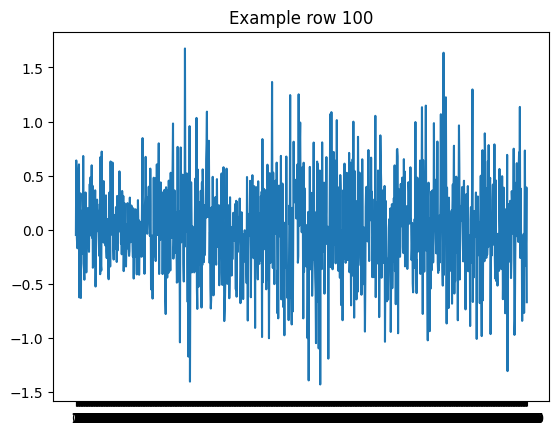

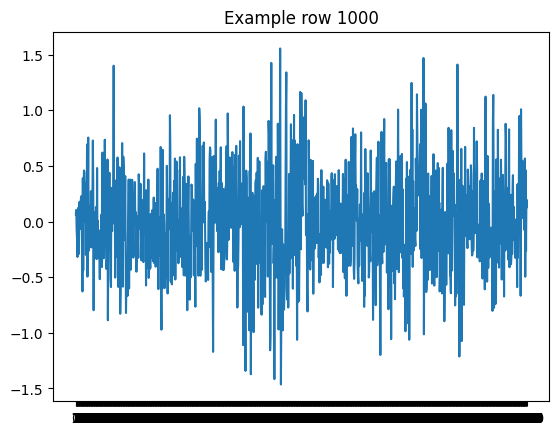

In [6]:
# Plot example rows

idx_list = [0, 100, 1000]
for idx in idx_list:
    plt.plot(y_pred.iloc[idx])
    plt.title(f"Example row {idx}")
    plt.show()

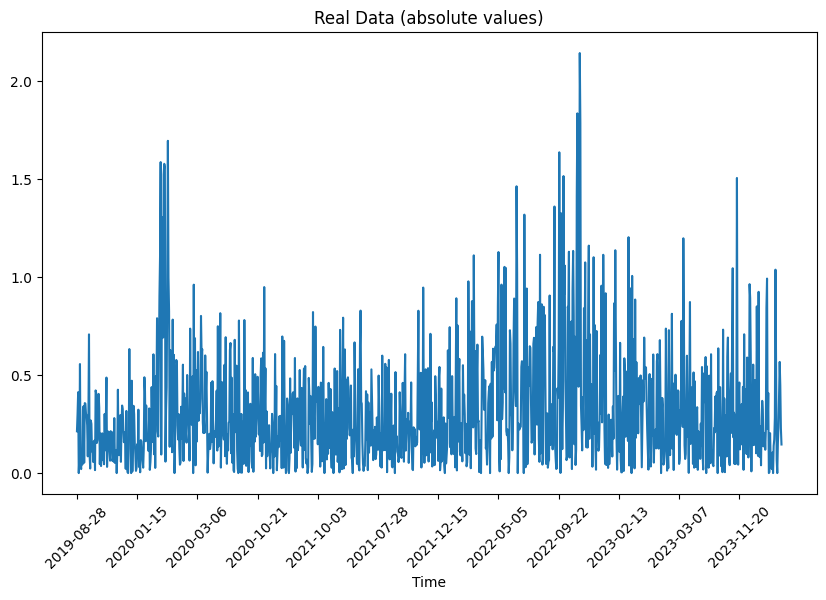

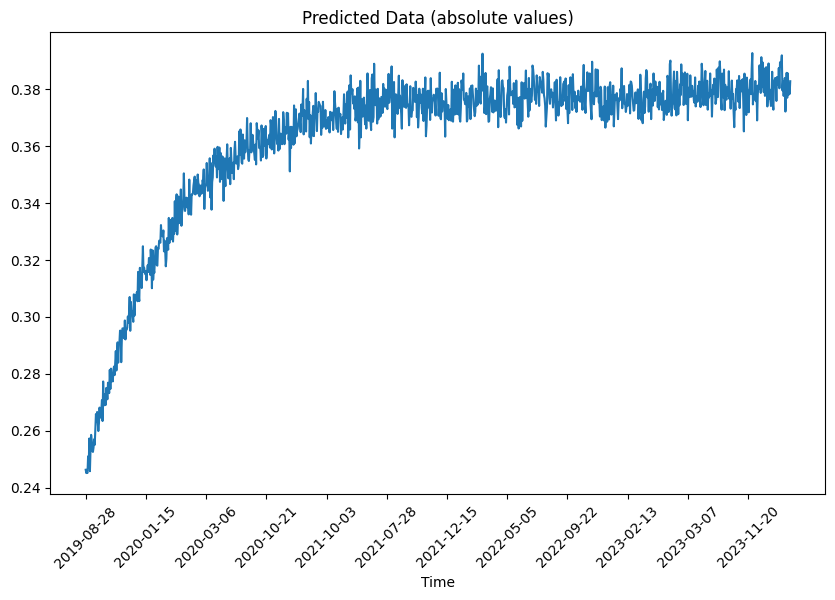

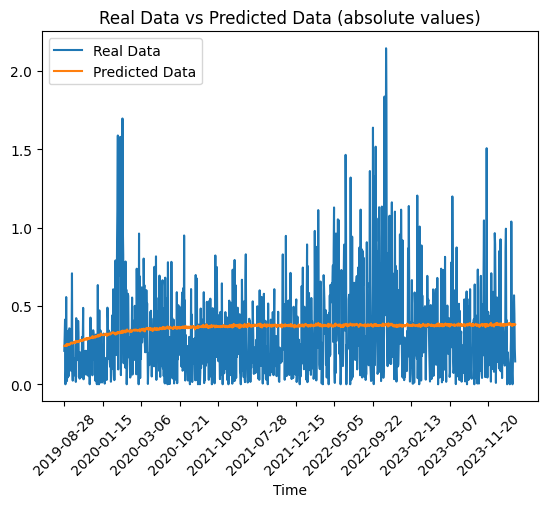

In [13]:
# Take abs of the real data and the predicted data. Then compare the mean over each column of the predicted data
real_data_abs = real_data.abs()
y_pred_abs = y_pred.abs()

# Calculate the mean of the absolute values of the predicted data
y_pred_mean = y_pred_abs.mean(axis=0)

# set the index of y_pred_mean to that of real_data_abs
y_pred_mean.index = real_data_abs.index

# Plot the real data
plt.figure(figsize=(10, 6))
plt.plot(real_data_abs, label='Real Data')
plt.title('Real Data (absolute values)')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(real_data), step=100))
plt.xticks(rotation=45)
plt.show()

# Plot the mean of the absolute values of the predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_pred_mean, label='Predicted Data')
plt.title('Predicted Data (absolute values)')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(real_data), step=100))
plt.xticks(rotation=45)
plt.show()


# Plot both series
plt.plot(real_data_abs, label='Real Data')
plt.plot(y_pred_mean, label='Predicted Data')
plt.title('Real Data vs Predicted Data (absolute values)')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(real_data), step=100))
plt.xticks(rotation=45)
plt.legend()
plt.show()

,DXY
Date,
2019-08-28,0.214132
2019-08-29,0.301012
2019-08-30,0.413394
2019-02-09,-0.000945
2019-03-09,0.083940
...,...
2024-03-21,-0.411072
2024-03-22,0.567956
2024-03-25,0.448986


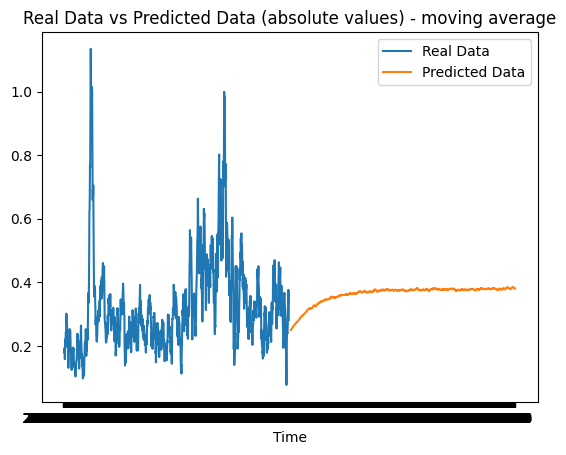

In [8]:
# Plot 5-period moving averages of both series
real_data_abs_ma = real_data_abs.rolling(window=10).mean()
y_pred_mean_ma = y_pred_mean.rolling(window=10).mean()

plt.plot(real_data_abs_ma, label='Real Data')
plt.plot(y_pred_mean_ma, label='Predicted Data')
plt.title('Real Data vs Predicted Data (absolute values) - moving average')
plt.xlabel('Time')
plt.legend()
plt.show()